In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
athlete_data_raw = pd.read_csv ("athlete_events.csv")
noc_data = pd.read_csv ("noc_regions.csv")
athlete_data = pd.merge (athlete_data_raw, noc_data, on= "NOC", how= "left", copy= True, validate= None)
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:
athletics_data = athlete_data.copy()
athletics_data = athletics_data [athletics_data["Sport"] == "Athletics"]
athletics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN,Estonia,NaN
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN,Norway,NaN


<h2> Exploring missing data using missingno </h2>

In [4]:
import missingno as msn

In [5]:
print ("Missing values in age:", end= "\t\t")
print (len(athletics_data[athletics_data["Age"].isna() == True].index))
print ("Missing values in height:", end= "\t")
print (len(athletics_data[athletics_data["Height"].isna() == True].index))
print ("Missing values in weight:", end= "\t")
print (len(athletics_data[athletics_data["Weight"].isna() == True].index))
print ("Missing values in medal:", end= "\t")
print (len(athletics_data[athletics_data["Medal"].isna() == True].index))

Missing values in age:		1117
Missing values in height:	5717
Missing values in weight:	6023
Missing values in medal:	34655


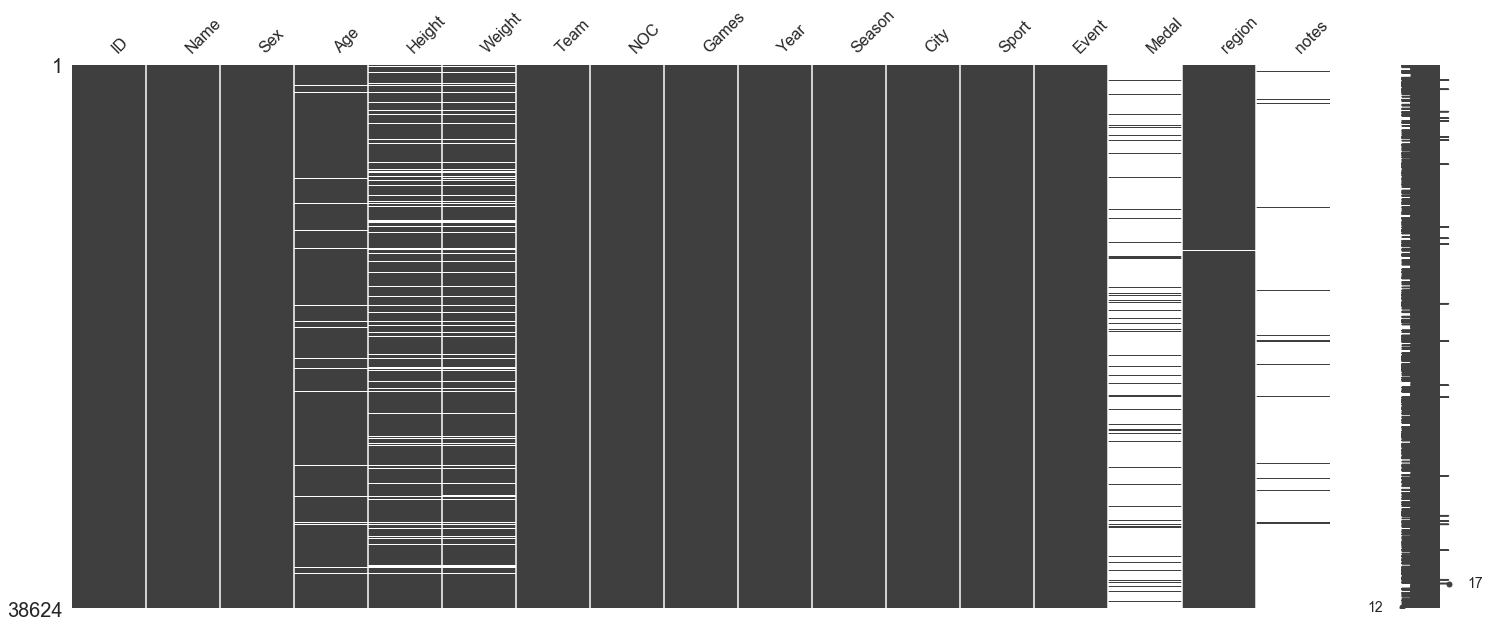

In [6]:
msn.matrix (athletics_data)

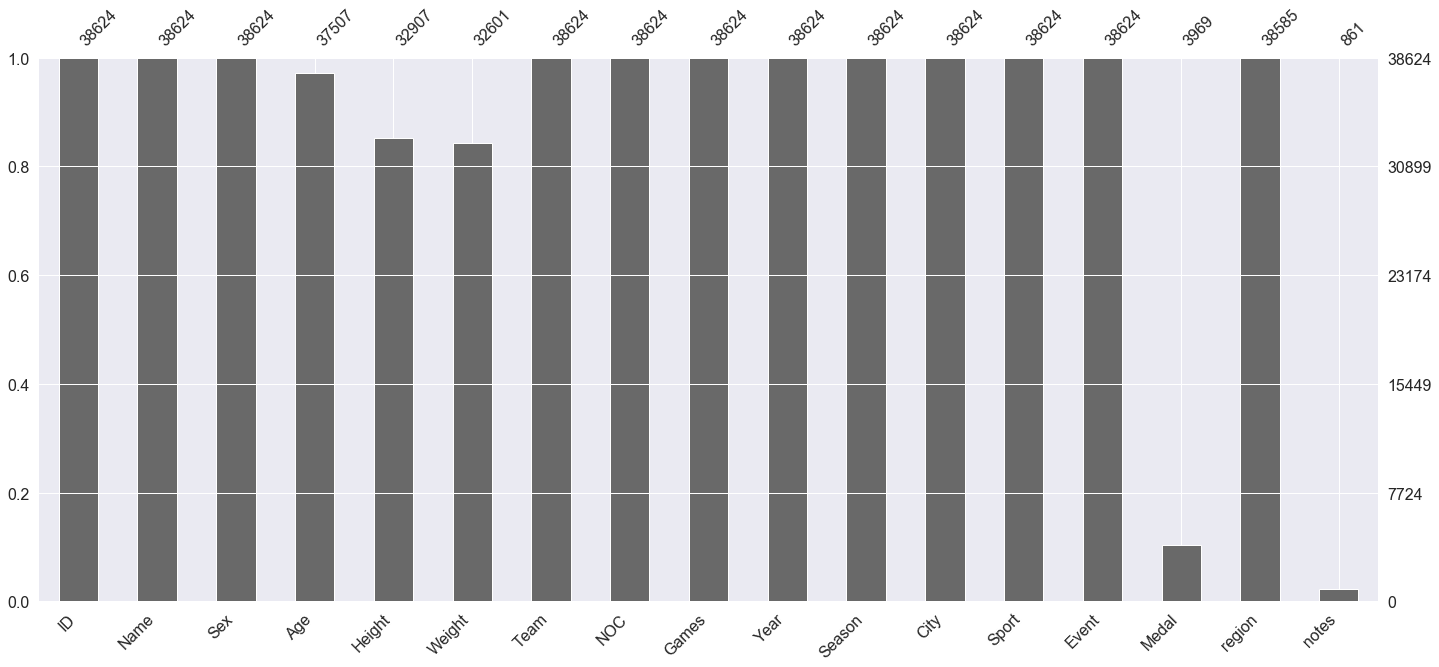

In [7]:
msn.bar (athletics_data)

<p> As you can see, there are some missing values in the variables "Age", "Height", "Weight" and "Medal" </p>
<p> As the amount of missing values is considerable, we need to impute these values </p>
<p> For "Medal", the missing values can be considered as having no medal </p>
<p> For "Age", "Height" and "Weight", we will fill the missing values with the mean of all the remaining values </p>

In [8]:
clean_data = athletics_data.copy()

In [9]:
mean_age = clean_data [clean_data["Age"].notna() == True]["Age"].mean()
mean_height = clean_data [clean_data["Height"].notna() == True]["Height"].mean()
mean_weight = clean_data [clean_data["Weight"].notna() == True]["Weight"].mean()

print ("Mean age:", end= "\t")
print (mean_age)
print ("Mean height:", end= "\t")
print (mean_height)
print ("Mean weight:", end= "\t")
print (mean_weight)

Mean age:	25.161223238328844
Mean height:	176.2562676634151
Mean weight:	69.24928683169227


In [10]:
clean_data["Age"] = clean_data["Age"].fillna(mean_age)
clean_data["Height"] = clean_data["Height"].fillna(mean_height)
clean_data["Weight"] = clean_data["Weight"].fillna(mean_weight)

In [11]:
clean_data["Medal"] = clean_data["Medal"].fillna("No Medal")

<p> Changing the "Event" variables to lowercase </p>

In [12]:
clean_data["Event"] = clean_data["Event"].str.lower()

In [13]:
clean_data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,69.249287,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,athletics women's 100 metres,No Medal,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,69.249287,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,athletics women's 4 x 100 metres relay,No Medal,Netherlands,NaN
57,18,Timo Antero Aaltonen,M,31.0,189.000000,130.000000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,athletics men's shot put,No Medal,Finland,NaN
94,31,Evald rma (rman-),M,24.0,174.000000,70.000000,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,athletics men's pole vault,No Medal,Estonia,NaN
95,32,Olav Augunson Aarnes,M,23.0,176.256268,69.249287,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,athletics men's high jump,No Medal,Norway,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.000000,76.000000,France,FRA,2012 Summer,2012,Summer,London,Athletics,"athletics men's 1,500 metres",No Medal,France,NaN
130,47,Erling Rudolf Aastad,M,22.0,177.000000,74.000000,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,athletics men's 4 x 100 metres relay,No Medal,Norway,NaN
131,47,Erling Rudolf Aastad,M,22.0,177.000000,74.000000,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,athletics men's long jump,No Medal,Norway,NaN
132,47,Erling Rudolf Aastad,M,26.0,177.000000,74.000000,Norway,NOR,1924 Summer,1924,Summer,Paris,Athletics,athletics men's long jump,No Medal,Norway,NaN
133,47,Erling Rudolf Aastad,M,30.0,177.000000,74.000000,Norway,NOR,1928 Summer,1928,Summer,Amsterdam,Athletics,athletics men's long jump,No Medal,Norway,NaN


<p> Check the data after filling in the missing values using missingno matrix </p>

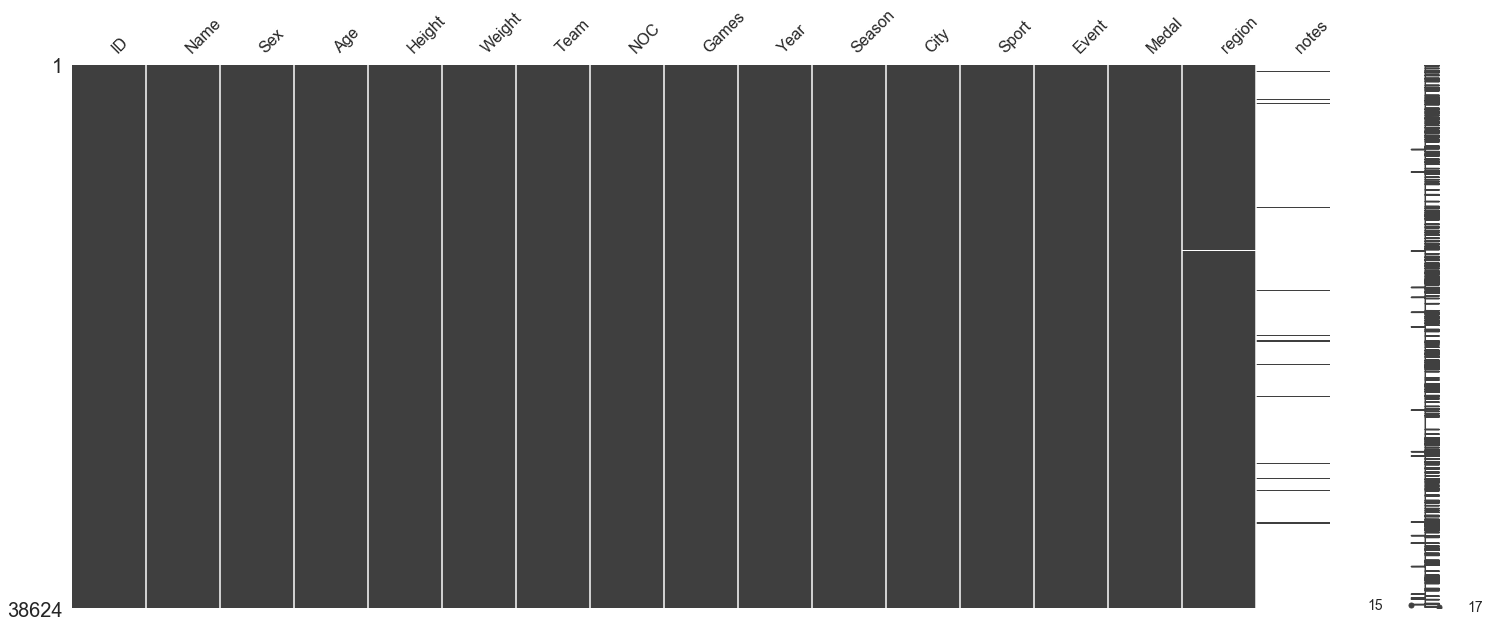

In [14]:
msn.matrix(clean_data)

<p> Creating variables for the machine learning models </p>
<p> For the model, we want to use age, height, weight, the year of participation, gender and the region of the participants as the predicting variables </p>
<p> For the results, we only want to use a binary categorical of medalist and non-medalist </p>
<p> We also need to turn the categorical variable of "Sex" and "region" into numerical variable to fit in the machine learning model</p>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Create a new column "Has Medal" that is a binary categorical data
#Encoding the gender of athlets into integers 1 and 0
clean_data["Has Medal"] = clean_data["Medal"].apply (lambda x: "No" if (x == "No Medal") else "Yes")
clean_data["Gender"] = clean_data["Sex"].apply (lambda x: 1 if (x == "M") else 0)

In [16]:
region_list = list(clean_data["region"].unique())

#function to return a number as region code to given a region name
#if there is no region name, the function returns -1

def region_to_number (region):
    j = 0
    for i in region_list:
        if (i == region):
            return j
        else:
            j += 1
    return -1

clean_data["RegionCode"] = clean_data["region"].apply(region_to_number)

In [17]:
clean_data["RegionCode"].describe()

count    38624.000000
mean        57.164017
std         46.982087
min         -1.000000
25%         16.000000
50%         44.000000
75%         85.000000
max        203.000000
Name: RegionCode, dtype: float64

<h2> Creating machine learning models </h2>
<h3> Using binary tree classification </h3>
<p> From the cleaned data, we split into train and test datasets and create a simple binary tree classification </p>

In [18]:
X = pd.DataFrame (clean_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]])
y = pd.DataFrame (clean_data["Has Medal"])

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 27)

medal_tree_model = DecisionTreeClassifier (max_depth = 6)
medal_tree_model.fit (x_train, y_train)

print ("Score for the train set:", end= "\t")
print (medal_tree_model.score(x_train, y_train))
print ("Score for the test set:", end= "\t\t")
print (medal_tree_model.score(x_test, y_test))

Score for the train set:	0.8978931357001845
Score for the test set:		0.8985113268608415


<p> Visualising the tree model created </p>

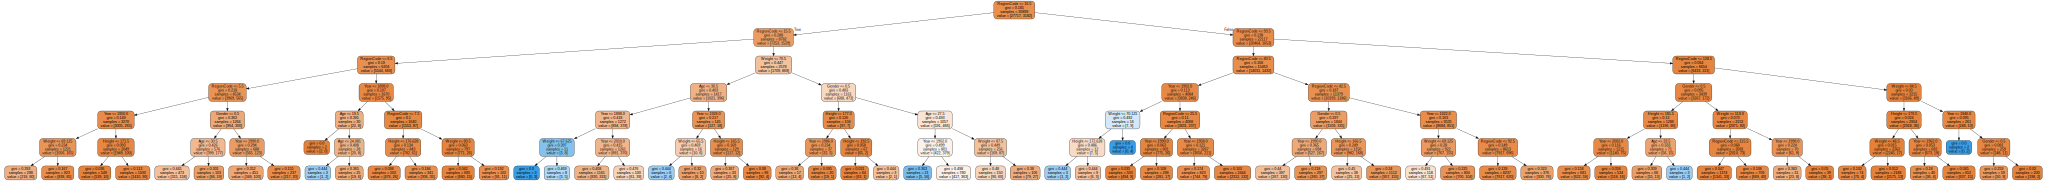

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

medal_visual = export_graphviz (medal_tree_model, filled= True, rounded= True, feature_names= x_train.columns, out_file= None)

graphviz.Source (medal_visual)

<p> Visualizing the result from the model we created using heatmap of the confusion matrix </p>

Text(0.5, 1, 'Confusion Matrix for the test set')

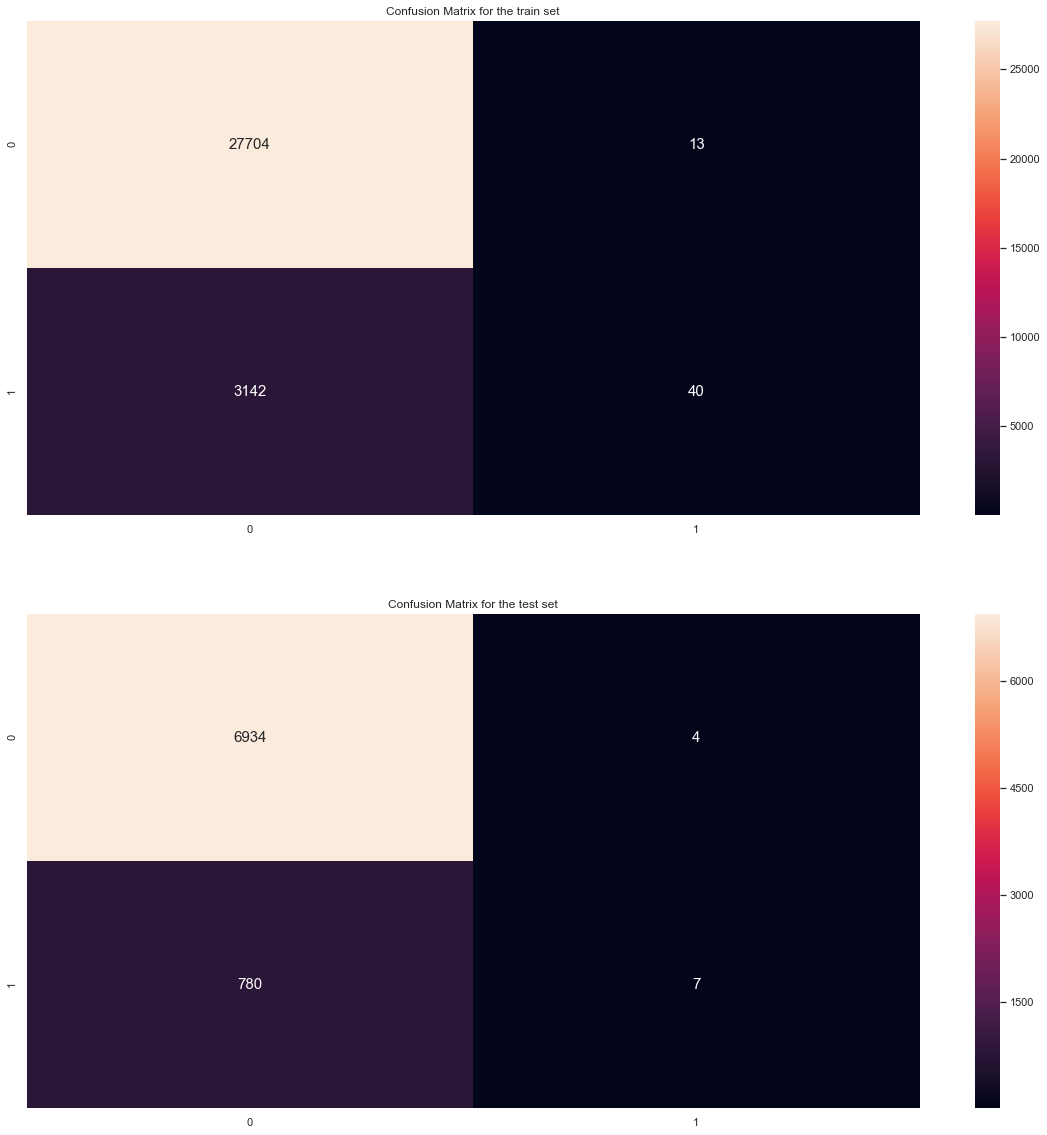

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

medal_visual = export_graphviz (medal_tree_model, filled= True, rounded= True, feature_names= x_train.columns, out_file= None)

graphviz.Source (medal_visual)

plot, axes= plt.subplots (2, 1, figsize= (20, 20))

sb.heatmap (confusion_matrix(y_train, medal_tree_model.predict(x_train)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, medal_tree_model.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set")
axes[1].set_title ("Confusion Matrix for the test set")

<p> The score of the model in both the train and the test dataset is 0.898, which is very high </p>
<p> However, looking into the confusion matrix, we can see that the model is not able to predict true positives, as represented in the low number of true positives </p>
<p> We can represent all the classification accuracy score using sklearn classification_report to see that the recall score of the positive value is very low </p>

In [21]:
from sklearn.metrics import classification_report

print ("Classification report for the train set:")
print (classification_report(y_train, medal_tree_model.predict(x_train)))
print ("Classification report for the test set:")
print (classification_report(y_test, medal_tree_model.predict(x_test)))

Classification report for the train set:
              precision    recall  f1-score   support

          No       0.90      1.00      0.95     27717
         Yes       0.75      0.01      0.02      3182

    accuracy                           0.90     30899
   macro avg       0.83      0.51      0.49     30899
weighted avg       0.88      0.90      0.85     30899

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.90      1.00      0.95      6938
         Yes       0.64      0.01      0.02       787

    accuracy                           0.90      7725
   macro avg       0.77      0.50      0.48      7725
weighted avg       0.87      0.90      0.85      7725



<p> The model seems to predict almost all oof the data to be the negative value, as represented by the  </p>
<p> This can be due to the problem of imbalanced data in the two categories of medalist and non-medalist </p>

Ratio of the data that of non-medalists versus medalists:	8.731418493323256


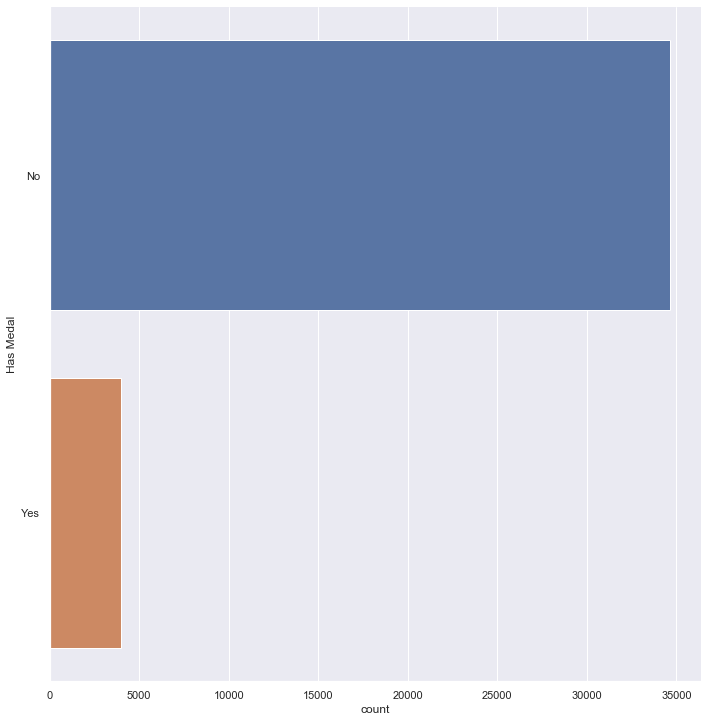

In [22]:
print ("Ratio of the data that of non-medalists versus medalists:", end= "\t")
print (len(clean_data[clean_data["Has Medal"] == "No"]) / len(clean_data[clean_data["Has Medal"] == "Yes"]))

sb.catplot (y= "Has Medal", data= clean_data, kind= "count", height= 10)

<p> From the visualization, the negative class has many more times of the data than the positive class </p>
<p> If we want our predicting model to be able to predict true positives, we need to balance our train dataset. The method is called resample the data </p>
<p> In sklearn, there is a function called resample that allows us to randomly oversampling or undesampling the dataset. We gonna use this function to resample our training dataset. </p>
<p> More infomation about random sampling can be found here: http://www.stat.yale.edu/Courses/1997-98/101/sample.htm </p>
<p> After resampled, we can use our new train dataset to fit into the model and test out the model using the test dataset. The test dataset is not resampled so that our test data is the true data collected </p>

In [23]:
from sklearn.utils import resample

#Oversampling the data of medalists to match the length of non medalists in the train set 
train_data = pd.concat ([x_train, y_train], axis= 1)
train_data_has_medal = train_data[train_data["Has Medal"] == "Yes"]
train_data_no_medal = train_data[train_data["Has Medal"] == "No"]

medal_resample = resample(train_data_has_medal, replace= True, n_samples= len(train_data_no_medal), random_state= 27)
resampled_data = pd.concat([medal_resample, train_data_no_medal])

x_train_resampled = resampled_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y_train_resampled = resampled_data["Has Medal"]

medal_tree_model.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<p> Test out our new predicting model from the resampled dataset, using classification_report </p>

In [24]:
print ("Accuracy of the model using resampled data (tree model)\n")
print ("Score for the train set:", end= "\t")
print (medal_tree_model.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (medal_tree_model.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, medal_tree_model.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, medal_tree_model.predict(x_test)))

Accuracy of the model using resampled data (tree model)

Score for the train set:	0.719666630587726
Score for the test set:		0.6906148867313916
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.73      0.69      0.71     27717
         Yes       0.71      0.75      0.73     27717

    accuracy                           0.72     55434
   macro avg       0.72      0.72      0.72     55434
weighted avg       0.72      0.72      0.72     55434

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.96      0.69      0.80      6938
         Yes       0.21      0.74      0.33       787

    accuracy                           0.69      7725
   macro avg       0.58      0.71      0.56      7725
weighted avg       0.88      0.69      0.75      7725



<p> Using heatmap to visualize the results of our predicting model </p>

Text(0.5, 1, 'Confusion Matrix for the test set')

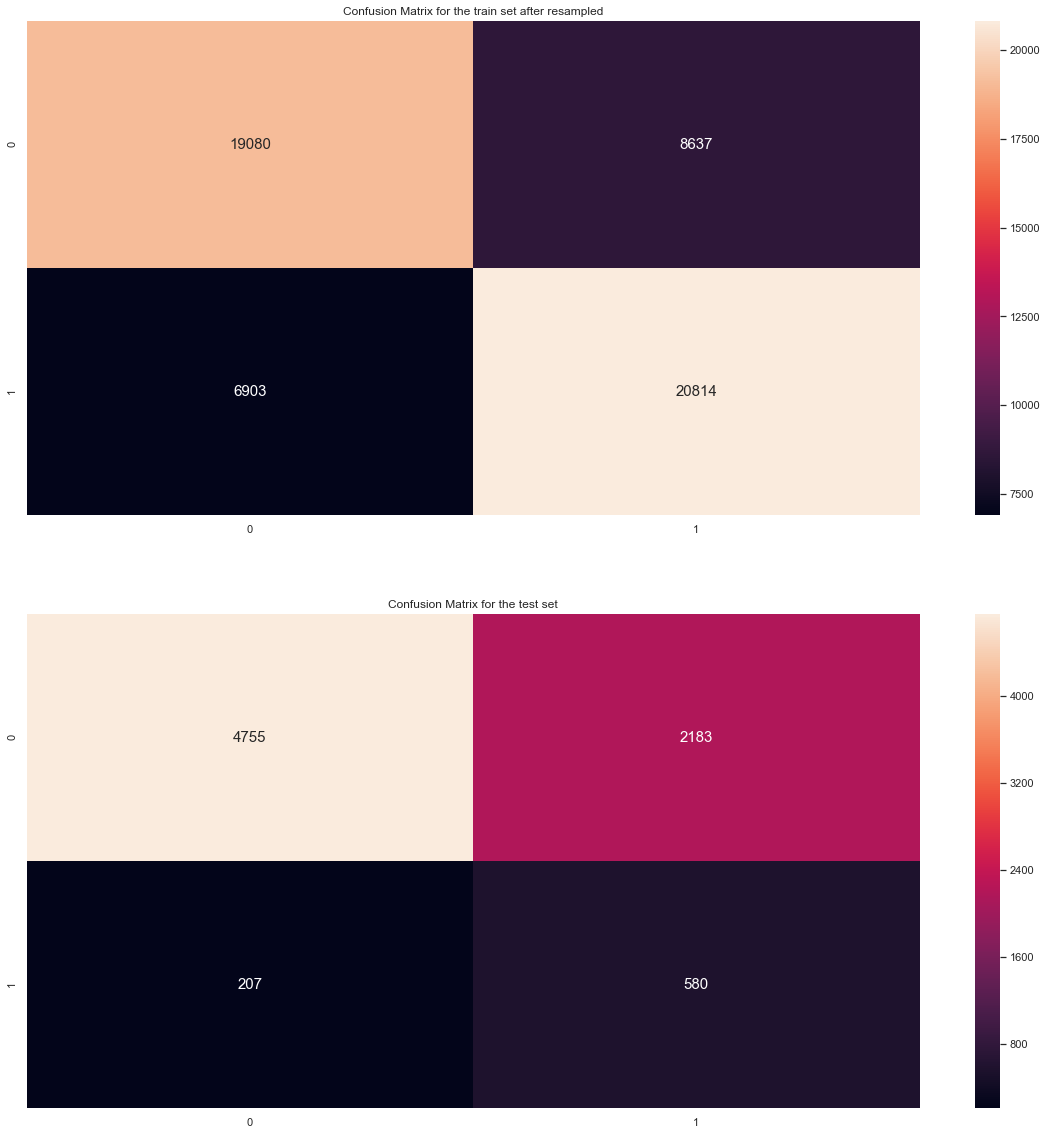

In [25]:
plot, axes= plt.subplots (2, 1, figsize= (20, 20))

sb.heatmap (confusion_matrix(y_train_resampled, medal_tree_model.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, medal_tree_model.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set after resampled")
axes[1].set_title ("Confusion Matrix for the test set")

<p> As we can see, by resampling our train dataset, the model has been able to predict true positives with a much higher recall score </p>
<p> However, this method has a drawnback. The number of false postives has been increased, therefore decreasing the overall classification accuracy </p>
<p> If we look in terms of predicting both positive and negative values, this model is generally better than the previous model </p>
<p> Apart from binary tree classification, we can use other types of classification model and compare which one to be our best predicting model </p>

<h3> Using logistic regression </h3>
<p> Create our logistic regression model and fit it with our train dataset (after resampling) </p>

In [26]:
from sklearn.linear_model import LogisticRegression

medal_regression = LogisticRegression()
medal_regression.fit (x_train_resampled, y_train_resampled)

print ("Accuracy of the model using resampled data (using logistic regression)\n")
print ("Score for the train set:", end= "\t")
print (medal_regression.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (medal_regression.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, medal_regression.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, medal_regression.predict(x_test)))

Accuracy of the model using resampled data (using logistic regression)

Score for the train set:	0.6200165963127322
Score for the test set:		0.5685436893203883
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.64      0.56      0.60     27717
         Yes       0.61      0.68      0.64     27717

    accuracy                           0.62     55434
   macro avg       0.62      0.62      0.62     55434
weighted avg       0.62      0.62      0.62     55434

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.93      0.56      0.70      6938
         Yes       0.14      0.65      0.24       787

    accuracy                           0.57      7725
   macro avg       0.54      0.61      0.47      7725
weighted avg       0.85      0.57      0.65      7725



<p> Visualizing the result of our model using confusion matrix </p>

Text(0.5, 1, 'Confusion Matrix for the test set')

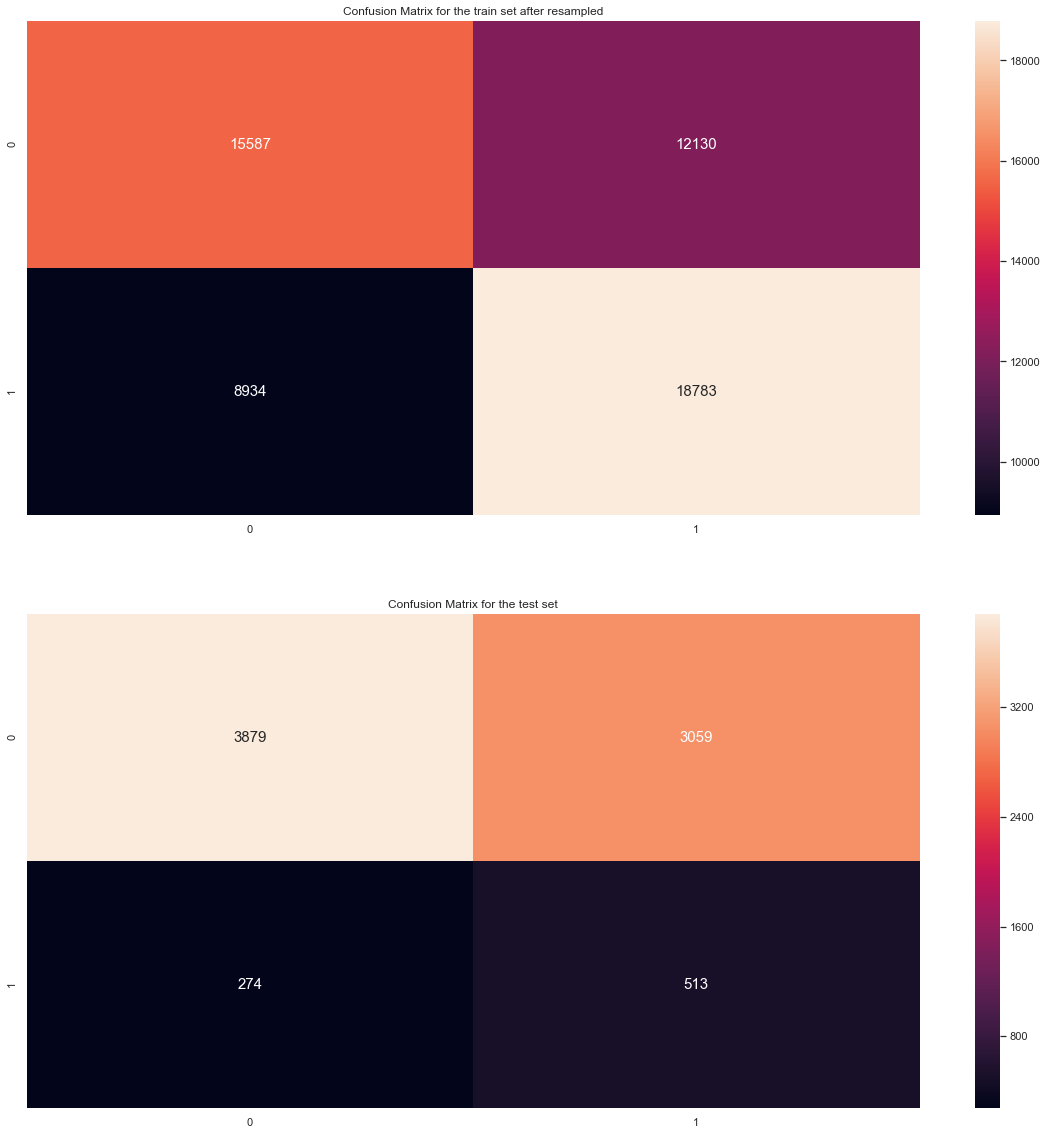

In [27]:
plot, axes= plt.subplots (2, 1, figsize= (20, 20))

sb.heatmap (confusion_matrix(y_train_resampled, medal_regression.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, medal_regression.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set after resampled")
axes[1].set_title ("Confusion Matrix for the test set")

<h3> Using random forest </h3>

In [28]:
from sklearn.ensemble import RandomForestClassifier

medal_forest = RandomForestClassifier(n_estimators = 200, max_depth= 6)
medal_forest.fit(x_train_resampled, y_train_resampled)

print ("Accuracy of the model using resampled data (using random forest)\n")
print ("Score for the train set:", end= "\t")
print (medal_forest.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (medal_forest.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, medal_forest.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, medal_forest.predict(x_test)))

Accuracy of the model using resampled data (using random forest)

Score for the train set:	0.7107010138182343
Score for the test set:		0.6978640776699029
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.71      0.72      0.71     27717
         Yes       0.71      0.71      0.71     27717

    accuracy                           0.71     55434
   macro avg       0.71      0.71      0.71     55434
weighted avg       0.71      0.71      0.71     55434

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.95      0.70      0.81      6938
         Yes       0.20      0.64      0.30       787

    accuracy                           0.70      7725
   macro avg       0.57      0.67      0.55      7725
weighted avg       0.87      0.70      0.76      7725



Text(0.5, 1, 'Confusion Matrix for the test set')

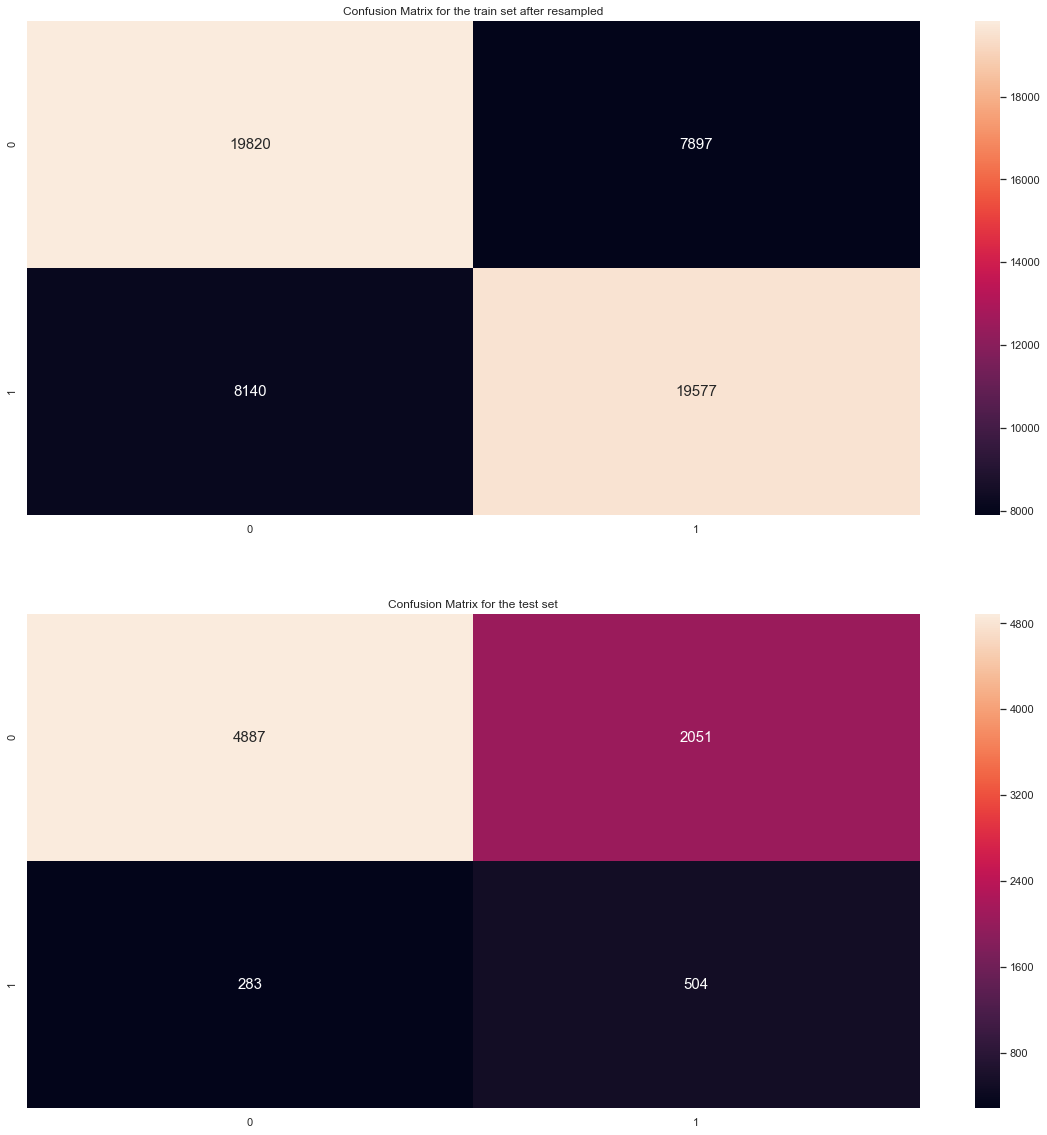

In [29]:
lot, axes= plt.subplots (2, 1, figsize= (20, 20))

sb.heatmap (confusion_matrix(y_train_resampled, medal_forest.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, medal_forest.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set after resampled")
axes[1].set_title ("Confusion Matrix for the test set")

<h3> Using MLP Classifier </h3>

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
medal_mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10, 10, 10))
medal_mlp.fit (x_train_resampled, y_train_resampled)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10, 10, 10, 10),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

Accuracy of the model using resampled data (using random forest)

Score for the train set:	0.6408955223880597
Score for the test set:		0.5591836734693878
              precision    recall  f1-score   support

          No       0.65      0.60      0.63      1675
         Yes       0.63      0.68      0.65      1675

    accuracy                           0.64      3350
   macro avg       0.64      0.64      0.64      3350
weighted avg       0.64      0.64      0.64      3350

              precision    recall  f1-score   support

          No       0.93      0.54      0.68       432
         Yes       0.17      0.69      0.27        58

    accuracy                           0.56       490
   macro avg       0.55      0.62      0.48       490
weighted avg       0.84      0.56      0.64       490



Text(0.5, 1, 'Confusion Matrix for the test set')

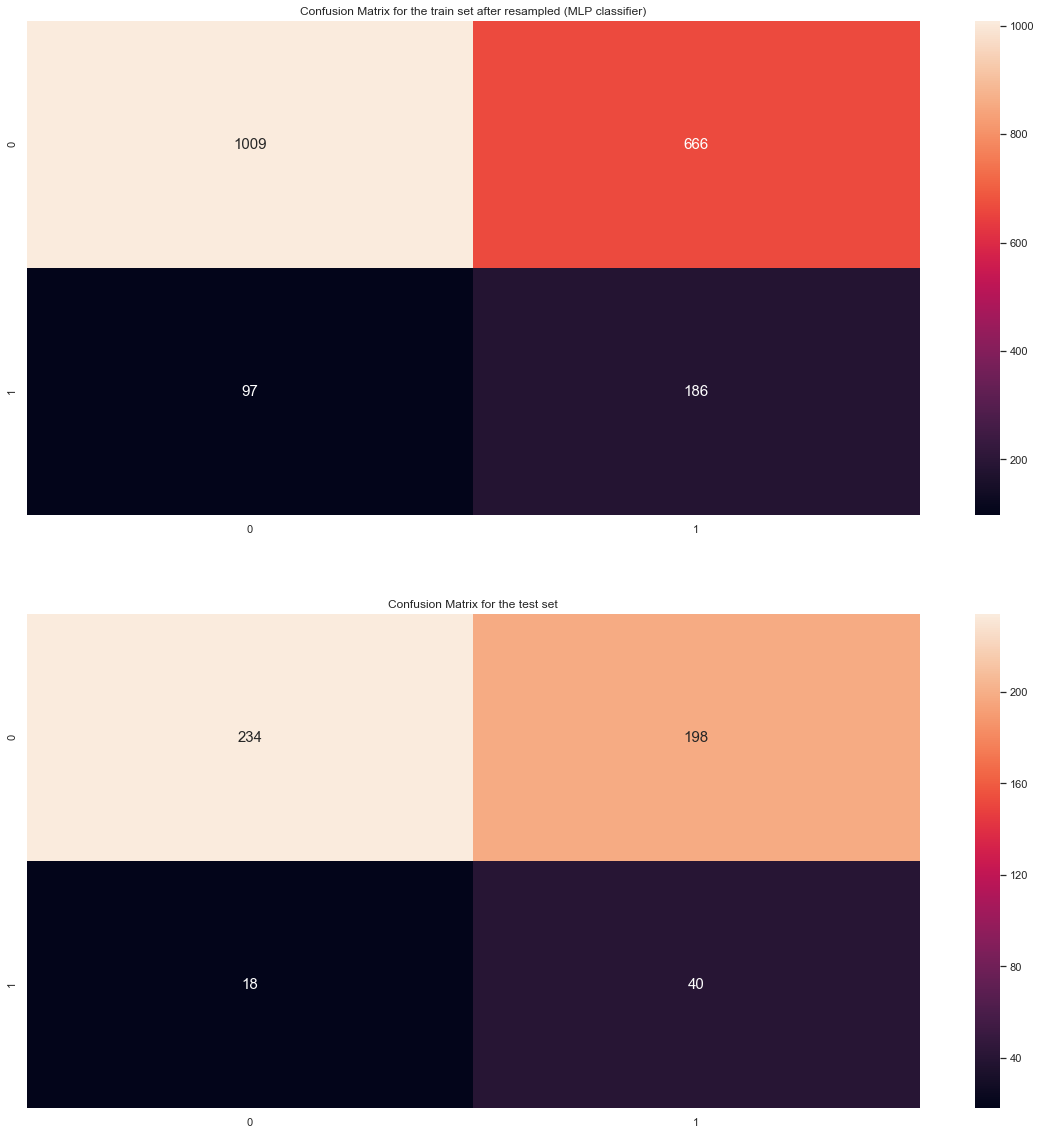

In [45]:
print ("Accuracy of the model using resampled data (using random forest)\n")
print ("Score for the train set:", end= "\t")
print (medal_mlp.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (medal_mlp.score(x_test, y_test))

print (classification_report(y_train_resampled, medal_mlp.predict(x_train_resampled)))
print (classification_report(y_test, medal_mlp.predict(x_test)))

plot, axes= plt.subplots (2, 1, figsize= (20, 20))

sb.heatmap (confusion_matrix(y_train, medal_mlp.predict(x_train)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, medal_mlp.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set after resampled (MLP classifier)")
axes[1].set_title ("Confusion Matrix for the test set")

<h3> Conclusion </h3>
<p> From the result we obtained, we can conclude that the normal binary tree and the random forest model are the better between the four models in predicting imbalaced dataset </p>

<h2> Event specific predicting models </h2>
<p> There is still one parameter that we did not consider in the previous models, which is the "event" variable </p>
<p> First we have to see the events that involved in athletics </p>

In [33]:
clean_data["Event"].unique()

array(["athletics women's 100 metres",
       "athletics women's 4 x 100 metres relay",
       "athletics men's shot put", "athletics men's pole vault",
       "athletics men's high jump", "athletics men's 1,500 metres",
       "athletics men's 4 x 100 metres relay",
       "athletics men's long jump", "athletics women's javelin throw",
       "athletics men's 5,000 metres", "athletics women's shot put",
       "athletics men's 110 metres hurdles", "athletics women's marathon",
       "athletics men's 100 metres", "athletics men's 400 metres hurdles",
       "athletics men's 400 metres", "athletics men's hammer throw",
       "athletics men's 800 metres", "athletics men's marathon",
       "athletics men's 4 x 400 metres relay",
       "athletics men's 10,000 metres", "athletics women's 3,000 metres",
       "athletics men's 200 metres", "athletics men's javelin throw",
       "athletics men's 3,000 metres steeplechase",
       "athletics women's 200 metres", "athletics men's triple ju

<p> As we can see, there are many events in athletics, but we can divide them into these categories:</p>
<ul>    
    <li> Cardio: running, walking, marathon,...</li>
    <li> Throwing: javelin throw, stone throw,...</li>
    <li> Jumping: high jump, triple jump,...</li>
    <li> Others. </li>
</ul>
<p> We shall split the dataset based on these categories, creating separate predicting models, using random forest </p>

In [34]:
#function to determine the type of event of a specific event base on certain words in the event name

def type_of_event (event):
    if (("metres" in event) | ("hurdles" in event) | ("marathon" in event) | ("walk" in event)):
        return "cardio"
    if (("throw" in event) | ("shot put" in event)):
        return "throwing"
    if ("jump" in event):
        return "jumping"
    else:
        return "others"

clean_data["type_of_event"] = clean_data["Event"].apply(type_of_event)
clean_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Has Medal,Gender,RegionCode,type_of_event
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,69.249287,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,athletics women's 100 metres,No Medal,Netherlands,NaN,No,0,0,cardio
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,69.249287,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,athletics women's 4 x 100 metres relay,No Medal,Netherlands,NaN,No,0,0,cardio
57,18,Timo Antero Aaltonen,M,31.0,189.000000,130.000000,Finland,FIN,2000 Summer,2000,...,Sydney,Athletics,athletics men's shot put,No Medal,Finland,NaN,No,1,1,throwing
94,31,Evald rma (rman-),M,24.0,174.000000,70.000000,Estonia,EST,1936 Summer,1936,...,Berlin,Athletics,athletics men's pole vault,No Medal,Estonia,NaN,No,1,2,others
95,32,Olav Augunson Aarnes,M,23.0,176.256268,69.249287,Norway,NOR,1912 Summer,1912,...,Stockholm,Athletics,athletics men's high jump,No Medal,Norway,NaN,No,1,3,jumping


<p> Splitting our dataset </p>

In [35]:
cardio_data = clean_data[clean_data["type_of_event"] == "cardio"]
throwing_data = clean_data[clean_data["type_of_event"] == "throwing"]
jumping_data = clean_data[clean_data["type_of_event"] == "jumping"]
others_data = clean_data[clean_data["type_of_event"] == "others"]

<p> Split our "cardio" dataset into train and test dataset, resample our train dataset and create our random forest model and test the accuracy with the test dataset </p>

Accuracy of the model for 'cardio' type of event

Score for the train set:	0.7759874734821699
Score for the test set:		0.7466666666666667
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.78      0.78      0.78     19798
         Yes       0.78      0.77      0.78     19798

    accuracy                           0.78     39596
   macro avg       0.78      0.78      0.78     39596
weighted avg       0.78      0.78      0.78     39596

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.95      0.76      0.84      4936
         Yes       0.23      0.65      0.33       539

    accuracy                           0.75      5475
   macro avg       0.59      0.70      0.59      5475
weighted avg       0.88      0.75      0.79      5475



Text(0.5, 1, 'Confusion Matrix for the test set')

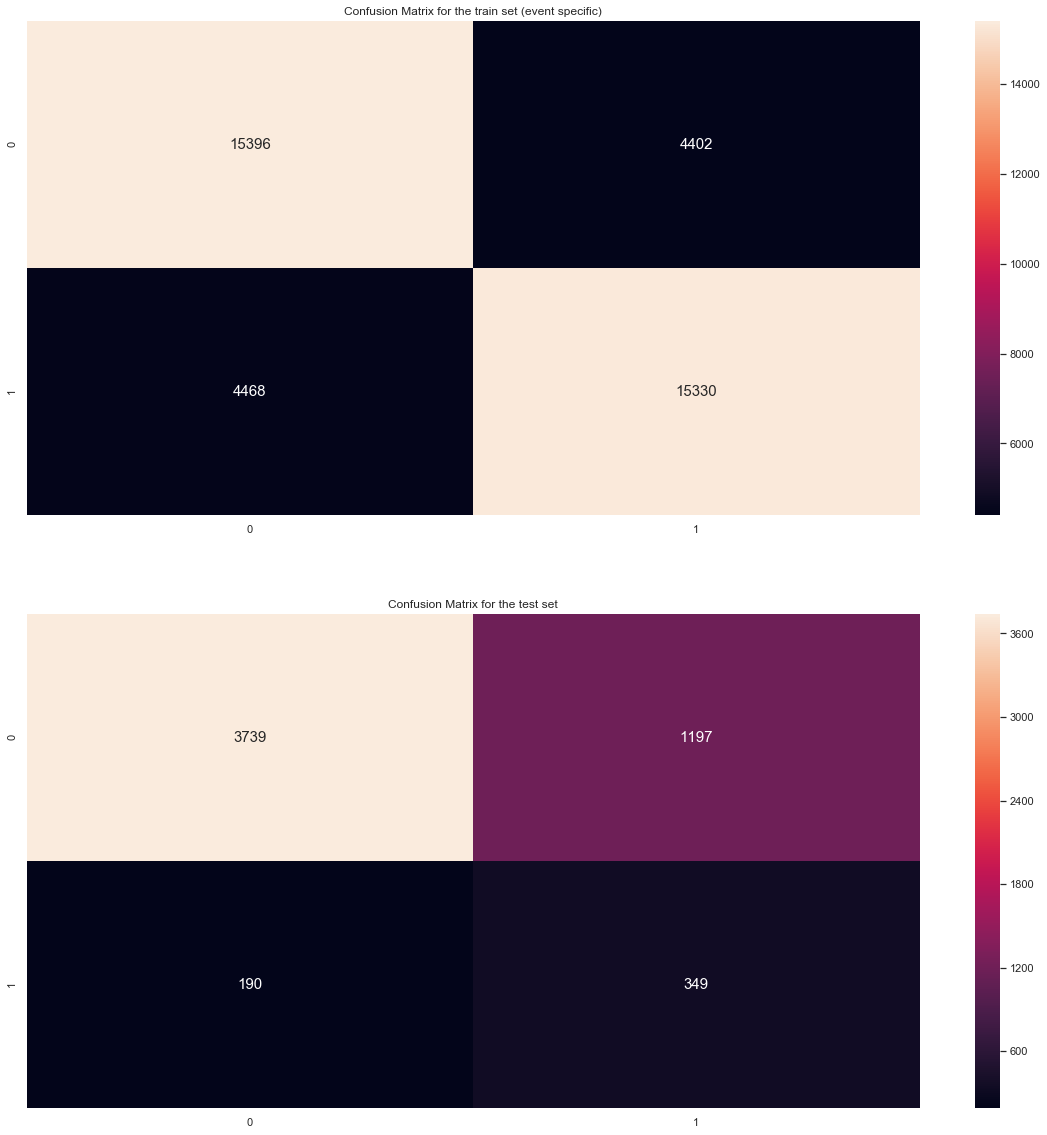

In [36]:
X = cardio_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y= cardio_data["Has Medal"]

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 27)

train_data = pd.concat ([x_train, y_train], axis= 1)
train_data_has_medal = train_data[train_data["Has Medal"] == "Yes"]
train_data_no_medal = train_data[train_data["Has Medal"] == "No"]

train_data_has_medal_resampled = resample(train_data_has_medal, replace= True, n_samples= len(train_data_no_medal), random_state= 27)
resampled_data = pd.concat([train_data_has_medal_resampled, train_data_no_medal])

x_train_resampled = resampled_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y_train_resampled = resampled_data["Has Medal"]

event_medal_forest = RandomForestClassifier (n_estimators= 200, max_depth= 8)
event_medal_forest.fit(x_train_resampled, y_train_resampled)

print ("Accuracy of the model for 'cardio' type of event\n")
print ("Score for the train set:", end= "\t")
print (event_medal_forest.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (event_medal_forest.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, event_medal_forest.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, event_medal_forest.predict(x_test)))

plot, axes = plt.subplots (2, 1, figsize= (20, 20))
sb.heatmap (confusion_matrix(y_train_resampled, event_medal_forest.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, event_medal_forest.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set (event specific)")
axes[1].set_title ("Confusion Matrix for the test set")

<p> Following the same procedure with the "throwing", "jumping" and "others" dataset </p>
<p> For the "throwing" dataset </p>

Accuracy of the model for 'throwing' type of event

Score for the train set:	0.7995426829268293
Score for the test set:		0.7179763186221744
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.80      0.79      0.80      3280
         Yes       0.80      0.81      0.80      3280

    accuracy                           0.80      6560
   macro avg       0.80      0.80      0.80      6560
weighted avg       0.80      0.80      0.80      6560

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.92      0.75      0.82       812
         Yes       0.23      0.52      0.32       117

    accuracy                           0.72       929
   macro avg       0.57      0.63      0.57       929
weighted avg       0.83      0.72      0.76       929



Text(0.5, 1, 'Confusion Matrix for the test set')

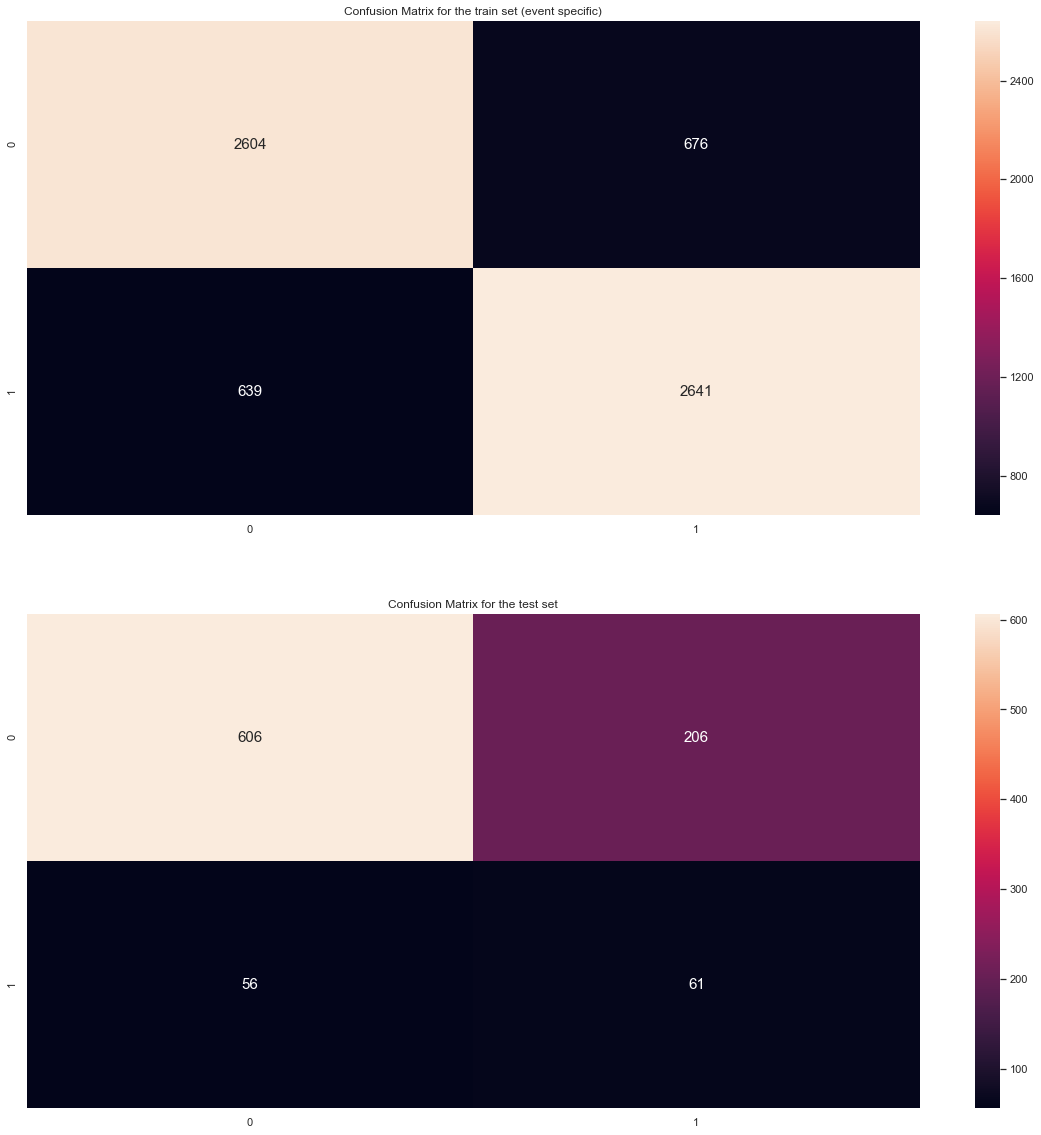

In [37]:
X = throwing_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y= throwing_data["Has Medal"]

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 27)

train_data = pd.concat ([x_train, y_train], axis= 1)
train_data_has_medal = train_data[train_data["Has Medal"] == "Yes"]
train_data_no_medal = train_data[train_data["Has Medal"] == "No"]

train_data_has_medal_resampled = resample(train_data_has_medal, replace= True, n_samples= len(train_data_no_medal), random_state= 27)
resampled_data = pd.concat([train_data_has_medal_resampled, train_data_no_medal])

x_train_resampled = resampled_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y_train_resampled = resampled_data["Has Medal"]

event_medal_forest = RandomForestClassifier (n_estimators= 200, max_depth= 6)
event_medal_forest.fit(x_train_resampled, y_train_resampled)

print ("Accuracy of the model for 'throwing' type of event\n")
print ("Score for the train set:", end= "\t")
print (event_medal_forest.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (event_medal_forest.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, event_medal_forest.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, event_medal_forest.predict(x_test)))

plot, axes = plt.subplots (2, 1, figsize= (20, 20))
sb.heatmap (confusion_matrix(y_train_resampled, event_medal_forest.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, event_medal_forest.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set (event specific)")
axes[1].set_title ("Confusion Matrix for the test set")

<p> For the "jumping" dataset </p>

Accuracy of the model for 'others' type of event

Score for the train set:	0.8787219805955169
Score for the test set:		0.7779111644657863
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.91      0.84      0.87      2989
         Yes       0.85      0.92      0.88      2989

    accuracy                           0.88      5978
   macro avg       0.88      0.88      0.88      5978
weighted avg       0.88      0.88      0.88      5978

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.93      0.81      0.86       733
         Yes       0.29      0.57      0.38       100

    accuracy                           0.78       833
   macro avg       0.61      0.69      0.62       833
weighted avg       0.85      0.78      0.81       833



Text(0.5, 1, 'Confusion Matrix for the test set')

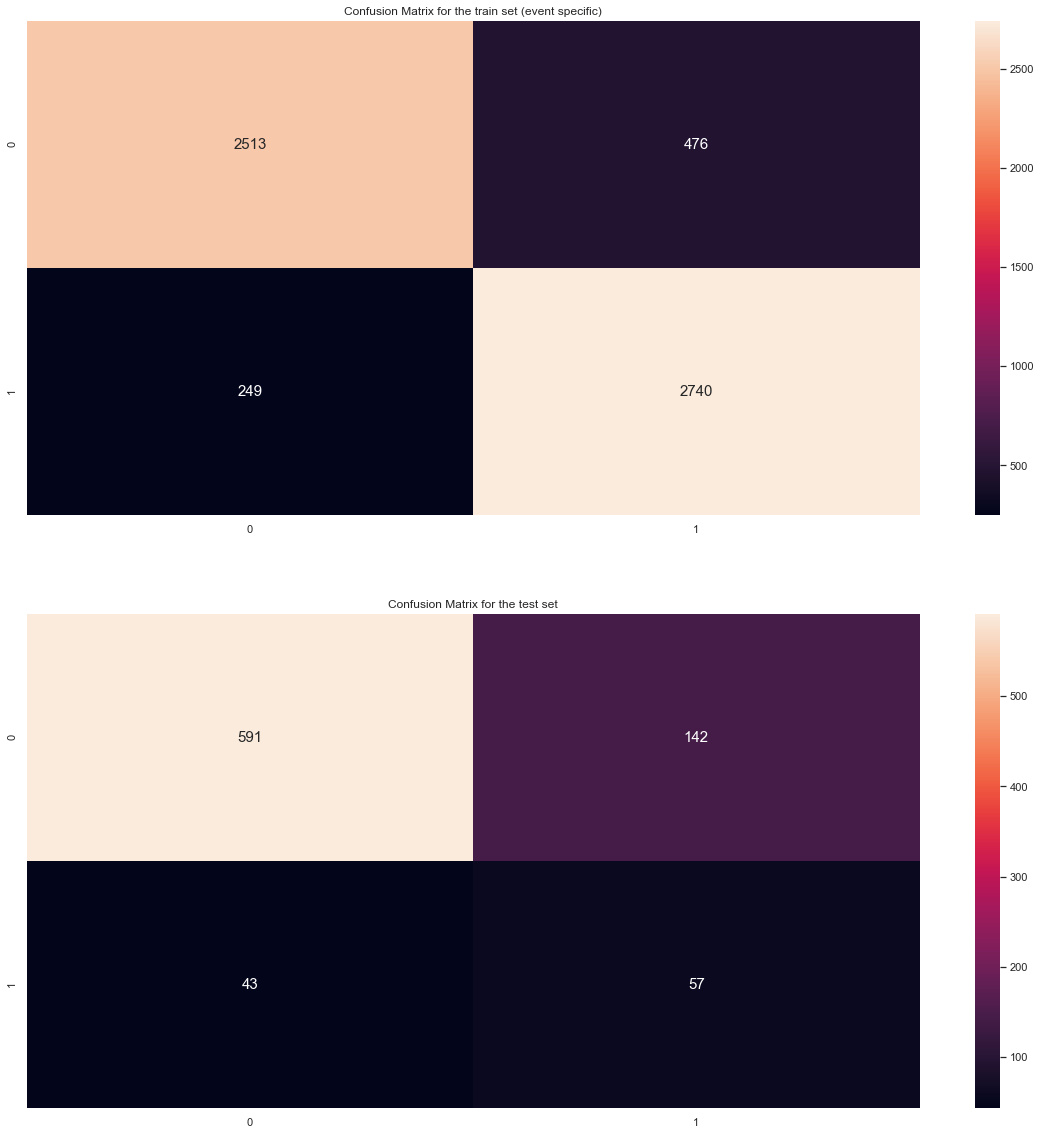

In [38]:
X = jumping_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y= jumping_data["Has Medal"]

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 27)

train_data = pd.concat ([x_train, y_train], axis= 1)
train_data_has_medal = train_data[train_data["Has Medal"] == "Yes"]
train_data_no_medal = train_data[train_data["Has Medal"] == "No"]

train_data_has_medal_resampled = resample(train_data_has_medal, replace= True, n_samples= len(train_data_no_medal), random_state= 27)
resampled_data = pd.concat([train_data_has_medal_resampled, train_data_no_medal])

x_train_resampled = resampled_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y_train_resampled = resampled_data["Has Medal"]

event_medal_forest = RandomForestClassifier (n_estimators= 200, max_depth= 8)
event_medal_forest.fit(x_train_resampled, y_train_resampled)

print ("Accuracy of the model for 'others' type of event\n")
print ("Score for the train set:", end= "\t")
print (event_medal_forest.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (event_medal_forest.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, event_medal_forest.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, event_medal_forest.predict(x_test)))

plot, axes = plt.subplots (2, 1, figsize= (20, 20))
sb.heatmap (confusion_matrix(y_train_resampled, event_medal_forest.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, event_medal_forest.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set (event specific)")
axes[1].set_title ("Confusion Matrix for the test set")

<p> For the "others" dataset </p>

Accuracy of the model for 'running' type of event

Score for the train set:	0.8570149253731343
Score for the test set:		0.7387755102040816
Classification report for the train set:
              precision    recall  f1-score   support

          No       0.90      0.81      0.85      1675
         Yes       0.82      0.91      0.86      1675

    accuracy                           0.86      3350
   macro avg       0.86      0.86      0.86      3350
weighted avg       0.86      0.86      0.86      3350

Classification report for the test set:
              precision    recall  f1-score   support

          No       0.93      0.76      0.84       432
         Yes       0.25      0.60      0.35        58

    accuracy                           0.74       490
   macro avg       0.59      0.68      0.59       490
weighted avg       0.85      0.74      0.78       490



Text(0.5, 1, 'Confusion Matrix for the test set')

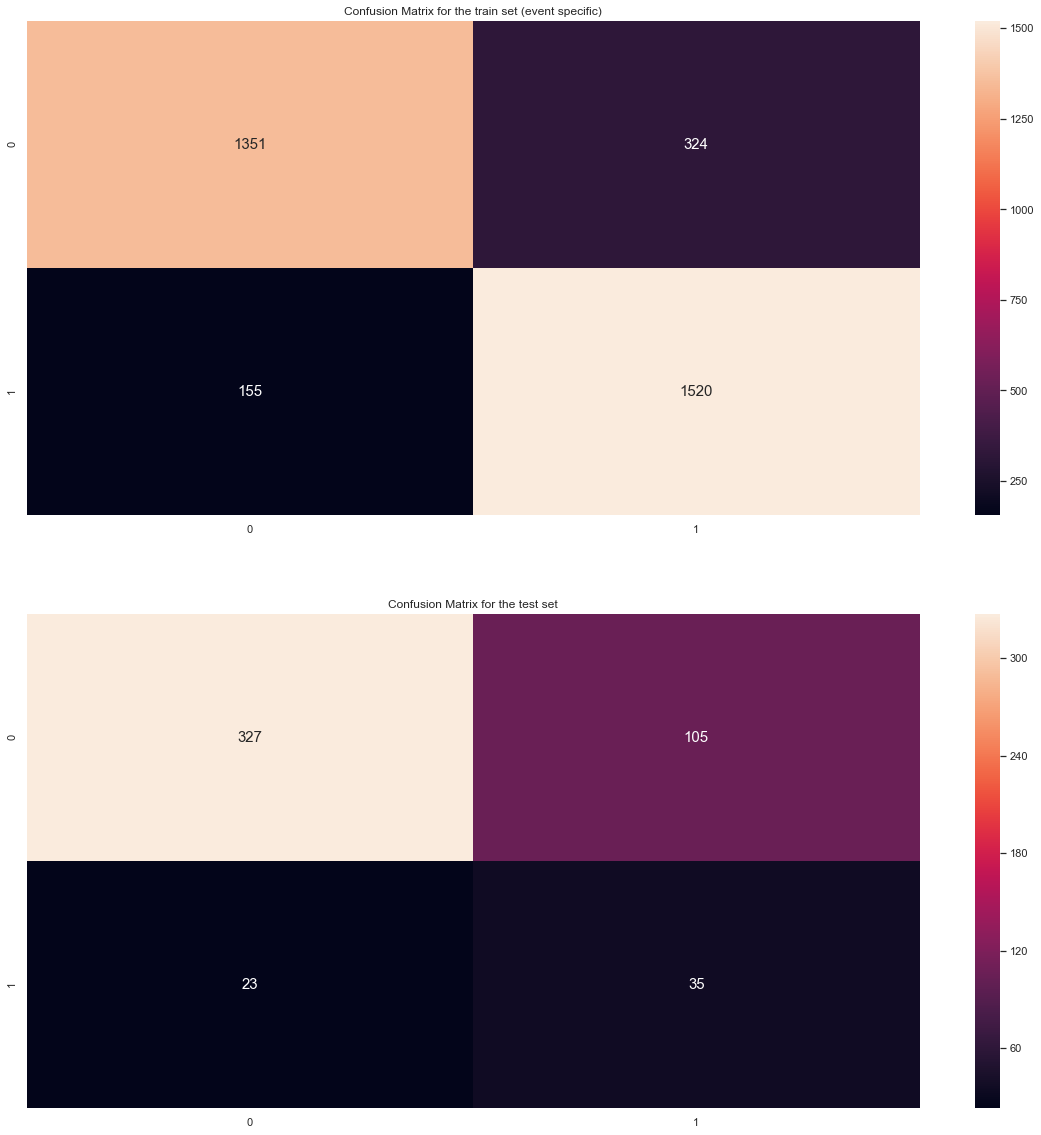

In [39]:
X = others_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y= others_data["Has Medal"]

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state= 27)

train_data = pd.concat ([x_train, y_train], axis= 1)
train_data_has_medal = train_data[train_data["Has Medal"] == "Yes"]
train_data_no_medal = train_data[train_data["Has Medal"] == "No"]

train_data_has_medal_resampled = resample(train_data_has_medal, replace= True, n_samples= len(train_data_no_medal), random_state= 27)
resampled_data = pd.concat([train_data_has_medal_resampled, train_data_no_medal])

x_train_resampled = resampled_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]
y_train_resampled = resampled_data["Has Medal"]

event_medal_forest = RandomForestClassifier (n_estimators= 200, max_depth= 7)
event_medal_forest.fit(x_train_resampled, y_train_resampled)

print ("Accuracy of the model for 'running' type of event\n")
print ("Score for the train set:", end= "\t")
print (event_medal_forest.score(x_train_resampled, y_train_resampled))
print ("Score for the test set:", end= "\t\t")
print (event_medal_forest.score(x_test, y_test))

print ("Classification report for the train set:")
print (classification_report(y_train_resampled, event_medal_forest.predict(x_train_resampled)))
print ("Classification report for the test set:")
print (classification_report(y_test, event_medal_forest.predict(x_test)))

plot, axes = plt.subplots (2, 1, figsize= (20, 20))
sb.heatmap (confusion_matrix(y_train_resampled, event_medal_forest.predict(x_train_resampled)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[0])
sb.heatmap (confusion_matrix(y_test, event_medal_forest.predict(x_test)), annot= True, fmt= ".0f", annot_kws= {"size": 15}, ax= axes[1])
axes[0].set_title ("Confusion Matrix for the train set (event specific)")
axes[1].set_title ("Confusion Matrix for the test set")

<h3> Conclusion</h3>
<p> From the classification accuracy score we obtained, the models we created by seperating the dataset into event-specific dataset provide us with a better accuracy. </p>
<p> However, in some of the models, the accuracy score for the train data is much higher than in the test data. This could be a probelm of overfitting the data. By seperating our dataset into event_specific dataset, some of the dataset have a much smaller amount of data, resulting in overfitting the data </p>
<p> Another reason for overfitting can come from resampling the train dataset </p>

In [64]:
print ("Length of carido data:", end= "\t\t")
print (len(cardio_data))
print ("Length of throwing data:", end= "\t")
print (len(throwing_data))
print ("Length of jumping data:", end= "\t\t")
print (len(jumping_data))
print ("Length of others data:", end= "\t\t")
print (len(others_data))

Length of carido data:		27371
Length of throwing data:	4642
Length of jumping data:		4163
Length of others data:		2448


<h1> Predicting medalists using anomaly detection </h1>
<p> One more way we can predict the medalists is to use anomaly detection. Here we assume the anomaly is the medalists </p>
<p> We detect the anomaly with all of the variables age, height, weight, gender, year and region </p>

In [49]:
from sklearn.neighbors import LocalOutlierFactor

X= clean_data[["Age", "Height", "Weight", "Gender", "Year", "RegionCode"]]

athlete_anomaly= LocalOutlierFactor (n_neighbors= 5, contamination= 0.2, p= 6)
athlete_anomaly.fit(X)

X["anomaly"] = athlete_anomaly.fit_predict(X)
X["anomaly"] = X["anomaly"].apply(lambda x: 0 if (x == 1) else 1)
X["anomaly"].head()

G:\Anaconda\envs\nguyentovinhhuy\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\Anaconda\envs\nguyentovinhhuy\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


26    0
27    0
57    0
94    1
95    1
Name: anomaly, dtype: int64

<p> Visualising anomalies using pairplot </p>

G:\Anaconda\envs\nguyentovinhhuy\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
G:\Anaconda\envs\nguyentovinhhuy\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


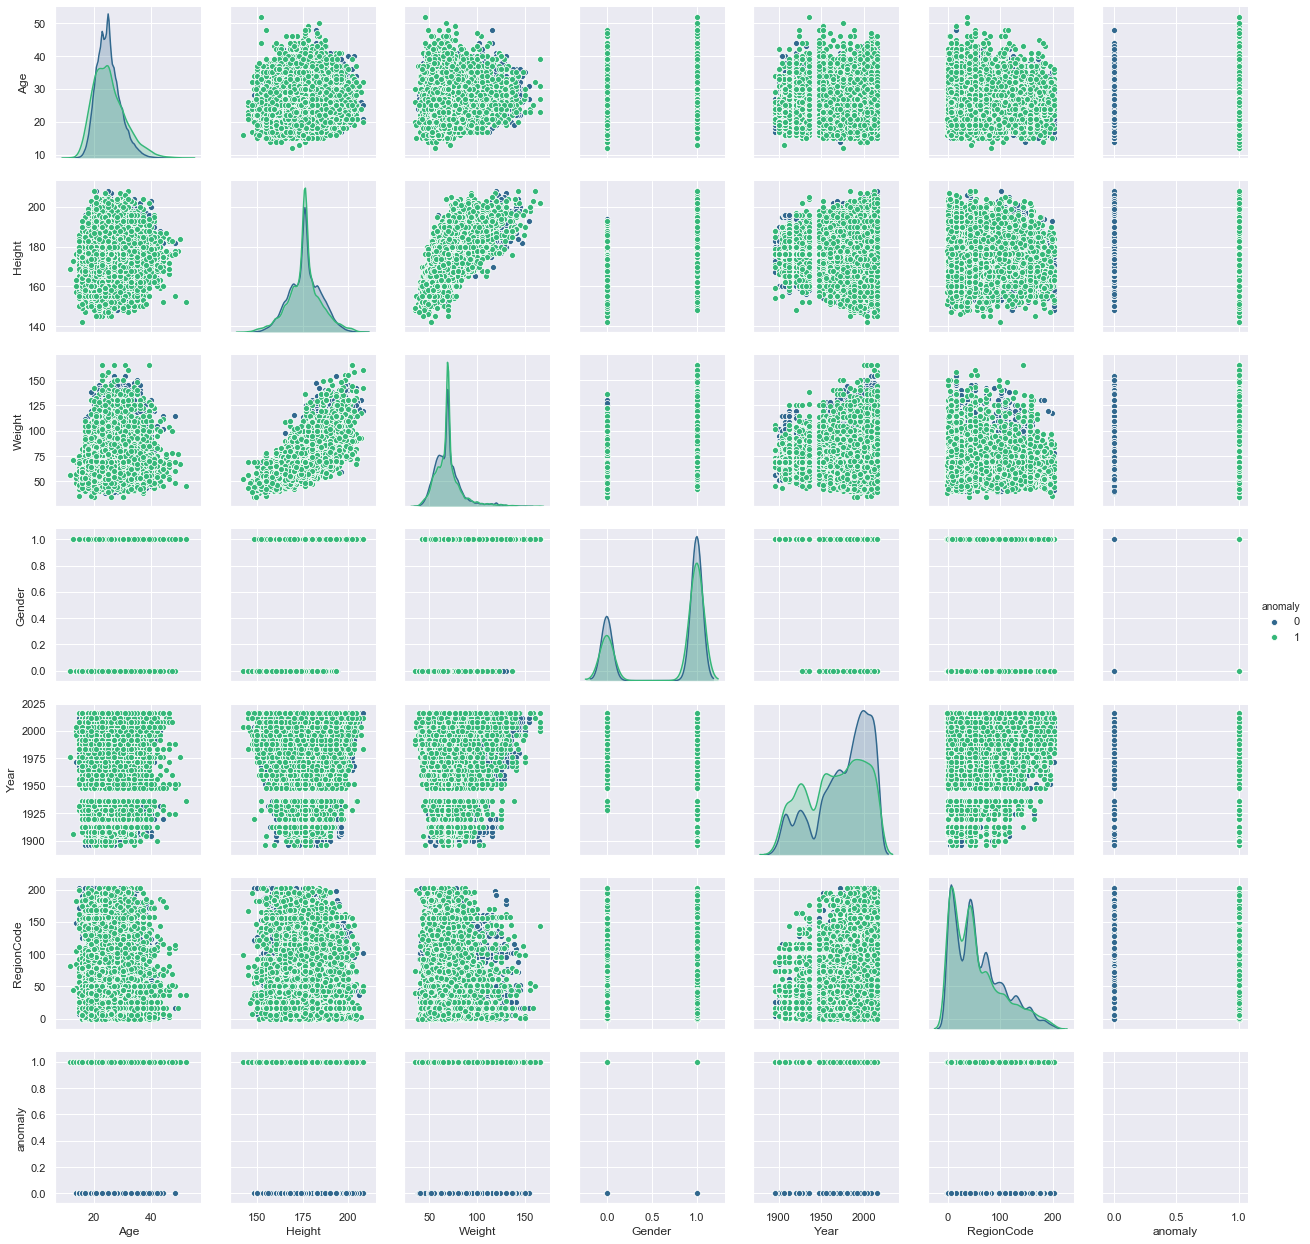

In [50]:
sb.pairplot (X, vars= X.columns.values, hue= "anomaly", palette= "viridis")

<p> Testing out our accuracy for anomaly detection using heatmap </p>

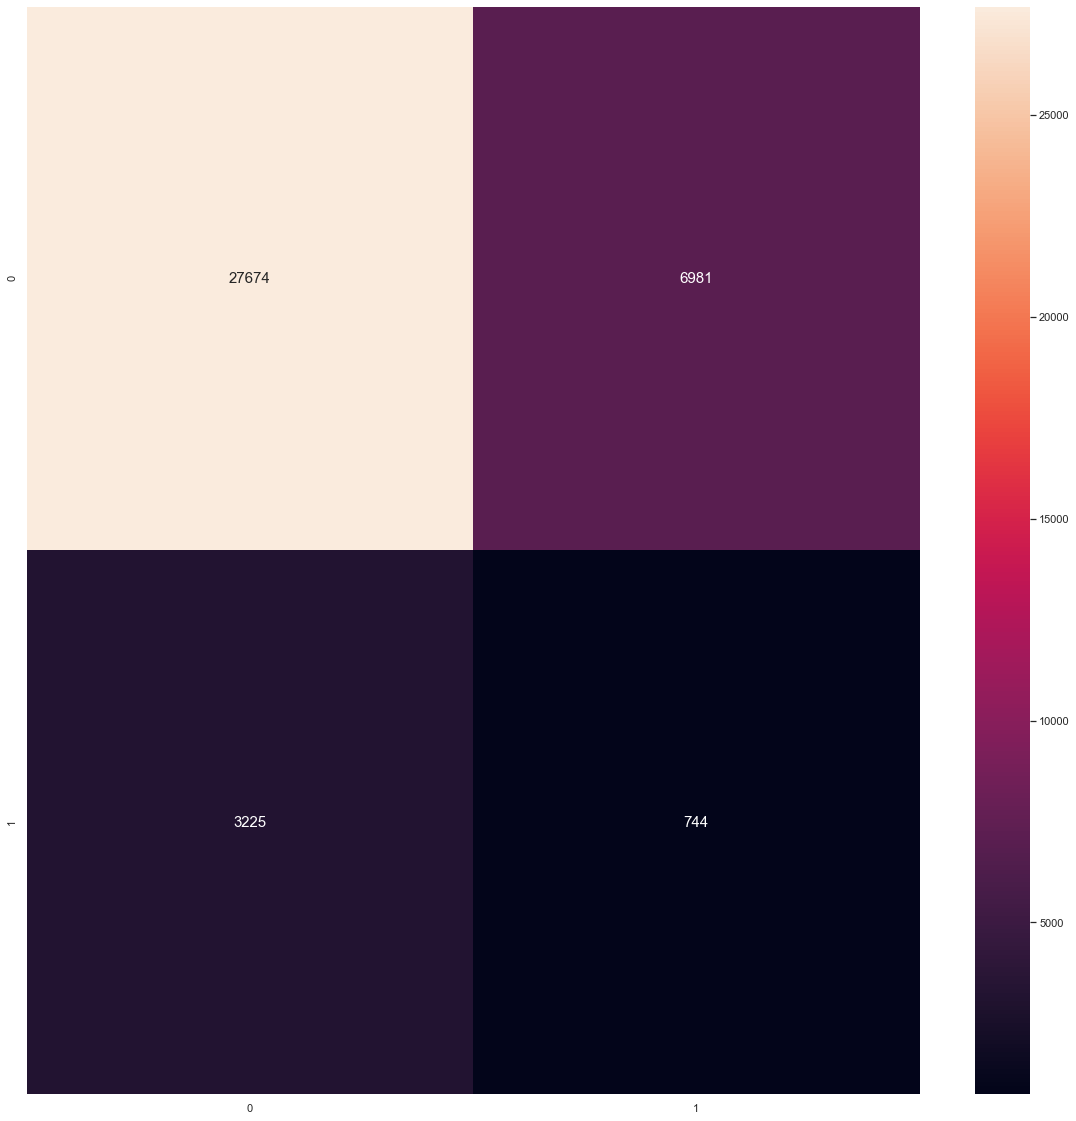

In [51]:
plot, axes= plt.subplots (1, 1, figsize= (20, 20))

sb.heatmap (confusion_matrix(clean_data["Has Medal"].apply(lambda x: 1 if (x == "Yes") else 0), X["anomaly"]), 
            annot= True, fmt= ".0f", annot_kws= {"size": 15})

In [65]:
medal_matrix = confusion_matrix(clean_data["Has Medal"].apply(lambda x: 1 if (x == "Yes") else 0), X["anomaly"])
print ("Classification accuracy:", end= "\t\t")
print ((medal_matrix[0][0] + medal_matrix[1][1]) / (medal_matrix[0][1] + medal_matrix[1][0] + medal_matrix[0][0] + medal_matrix[1][1]))
print ("True positive rate (recall score):", end= "\t")
print (medal_matrix[1][1] / (medal_matrix[1][1] + medal_matrix[1][0]))
print ("True negative rate:", end= "\t\t\t")
print (medal_matrix[0][0] / (medal_matrix[0][1] + medal_matrix[0][0]))

Classification accuracy:		0.7357601491300746
True positive rate (recall score):	0.1874527588813303
True negative rate:			0.7985572067522724
